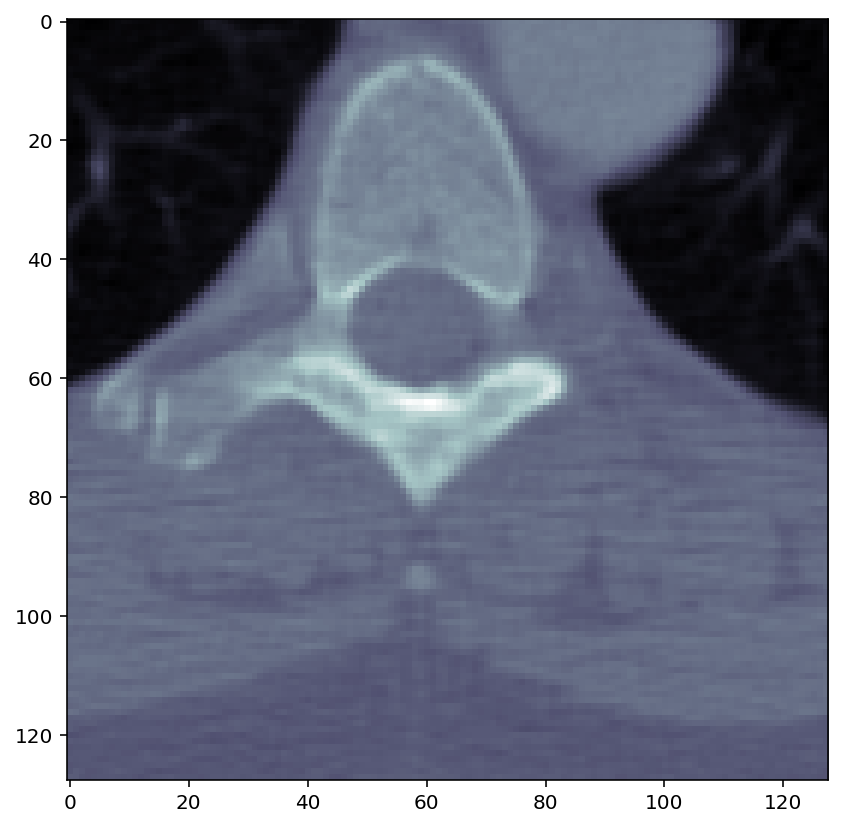

In [2]:
import matplotlib.pyplot as plt
import pydicom
import difflib
import numpy as np
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color

from pydicom.data import get_testdata_files

filename = get_testdata_files("CT_small.dcm")[0]
ds = pydicom.dcmread(filename)
plt.imshow(ds.pixel_array, cmap=plt.cm.bone)

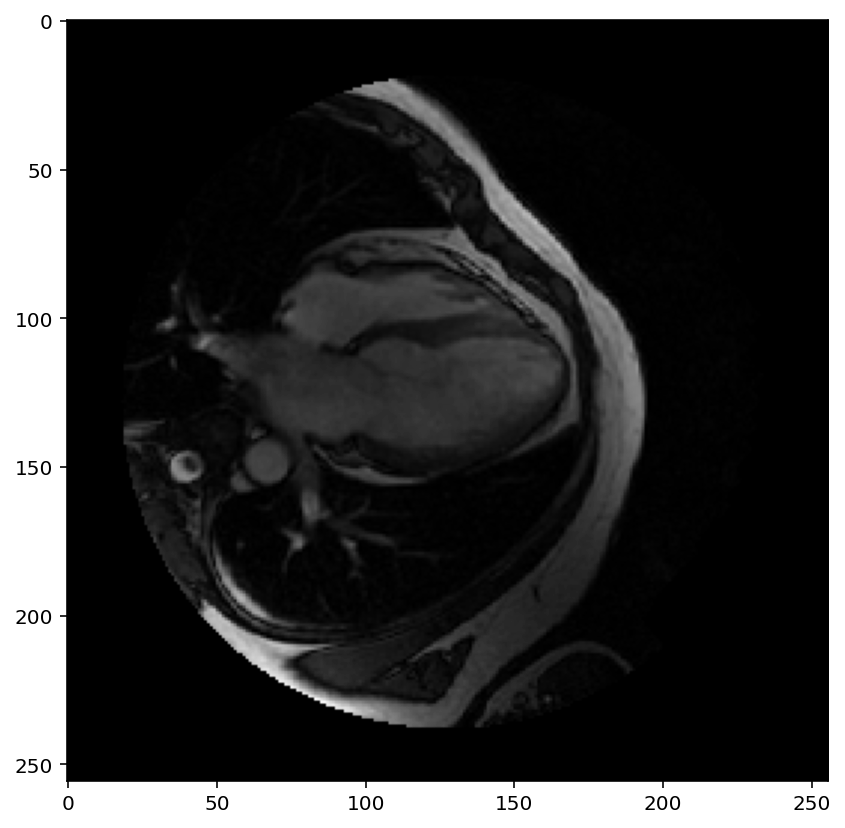

In [3]:
import matplotlib.pyplot as plt
import pydicom
filename = 'CAP_SCD0000101_MR__hrt_raw_20120813120609855_17.dcm'
dx = pydicom.dcmread(filename)
plt.imshow(dx.pixel_array, cmap="gray")


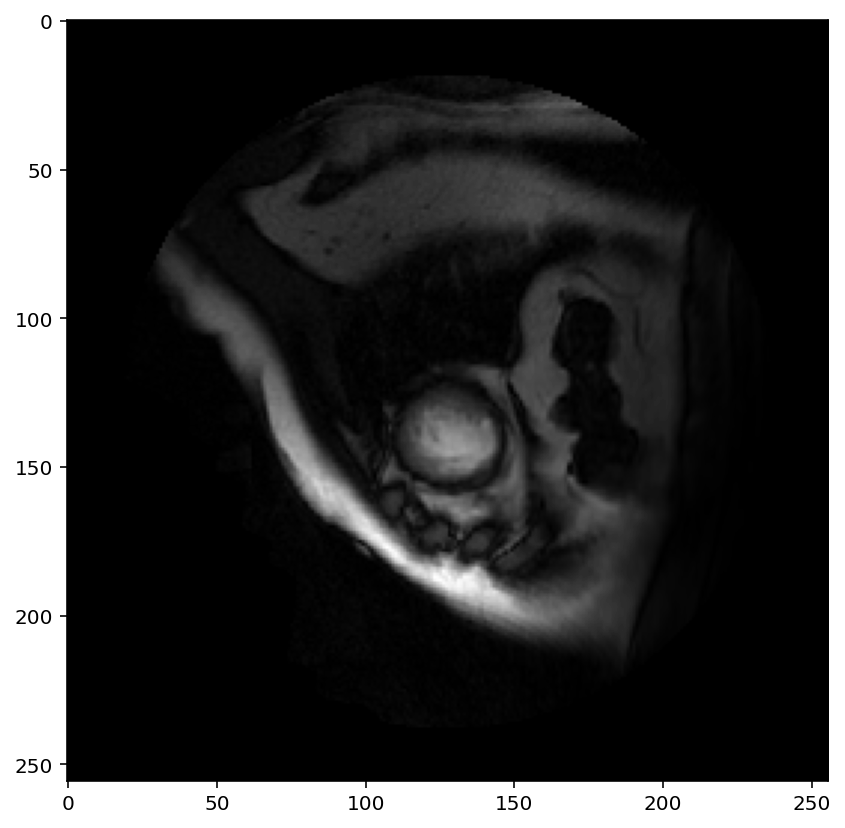

In [4]:
# import the image
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import skimage.color as color
image1 = io.imread('CAP_SCD0000101_MR__hrt_raw_20120813120606068_192.dcm')
plt.imshow(image1, cmap='gray')

<ipython-input-4-da146641a780>:35: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  snake = seg.active_contour(image_gray, points,alpha=0.06,beta=0.01)


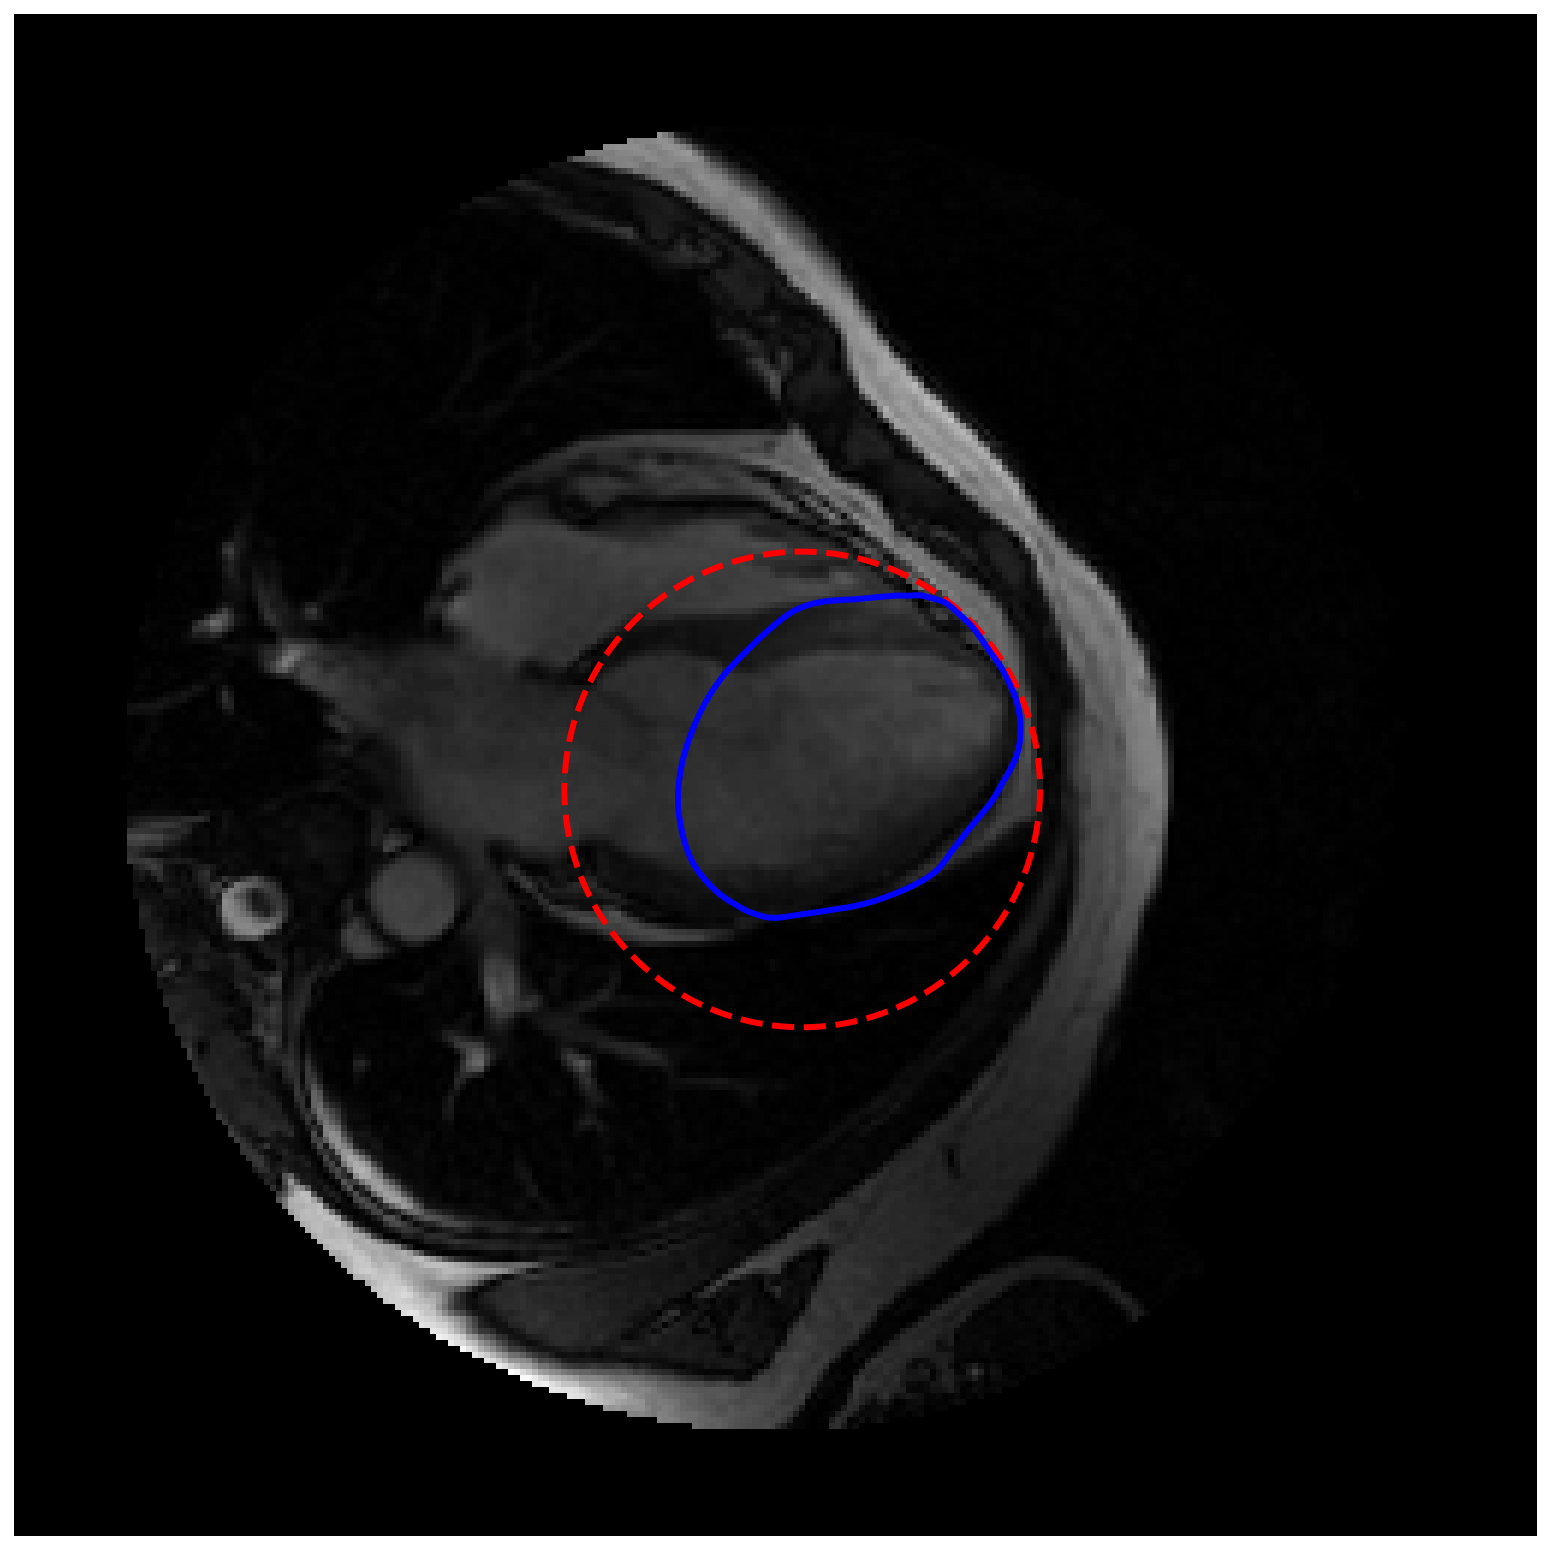

In [4]:
from skimage import io
import matplotlib.pyplot as plt
import pydicom
import difflib
import numpy as np
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color
filename = 'CAP_SCD0000101_MR__hrt_raw_20120813120609855_17.dcm'
dx = pydicom.dcmread(filename)

def circle_points(resolution, center, radius):
    #Generate points which define a circle on an image.Centre refers to the centre of the circle 
    radians = np.linspace(0, 2*np.pi, resolution)
    c = center[1] + radius*np.cos(radians)#polar co-ordinates
    r = center[0] + radius*np.sin(radians)

    return np.array([c, r]).T
# Exclude last point because a closed path should not have duplicate points
points = circle_points(290, [130, 132], 40)[:-2]

def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

#plt.imshow(dx.pixel_array, cmap="gray")
image1 = io.imread('CAP_SCD0000101_MR__hrt_raw_20120813120609855_17.dcm')
#plt.imshow(image1);
image_gray = (image1) #color.rgb2gray(image1)

snake = seg.active_contour(image_gray, points,alpha=0.06,beta=0.01)
fig, ax = image_show(image1)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);

#No me esta funcionando con Pydicom pero si con io(importing)
#image2=plt.imshow(dx.pixel_array, cmap="gray")
#fig, ax = image_show(image2)
#ax.plot(points[:, 0], points[:, 1], '--r', lw=3)




#Subplot side by side view

#f, axarr = plt.subplots(1,2)
#axarr[0].imshow(dx.pixel_array, cmap="gray")


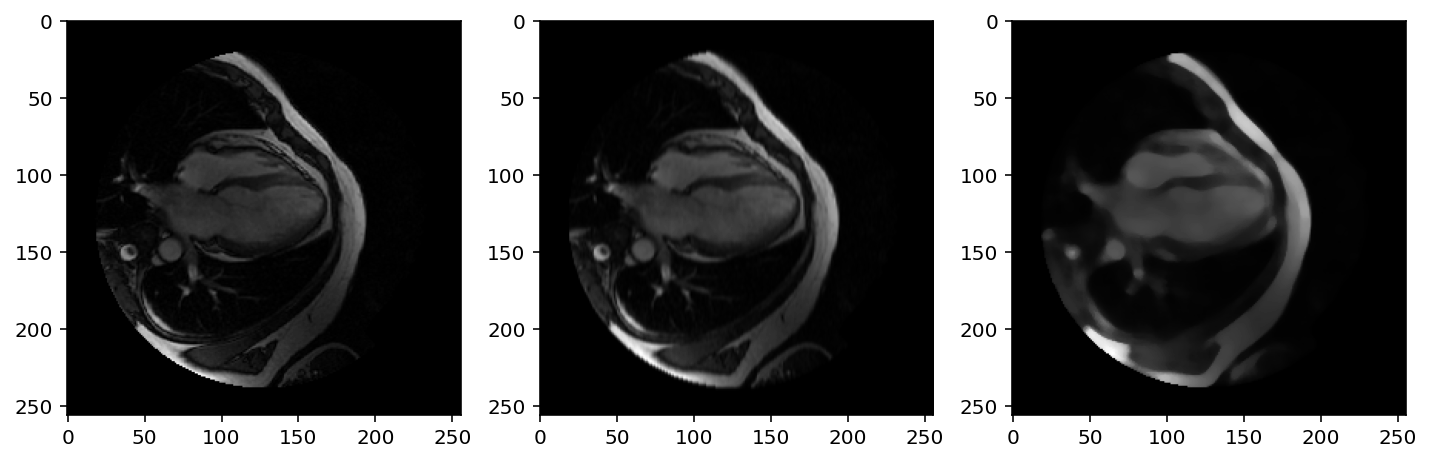

In [2]:
from skimage.filters import gaussian
from skimage import io
import matplotlib.pyplot as plt
import pydicom
import difflib
import numpy as np
import skimage.data as data
import skimage.segmentation as seg
import skimage.draw as draw
import skimage.color as color
from skimage.morphology import disk
from skimage.filters import median
image1 = io.imread('CAP_SCD0000101_MR__hrt_raw_20120813120609855_17.dcm')

filtered_img = gaussian(image1, sigma=1, multichannel=True)
med = median(image1, disk(5))
#plt.imshow(filtered_img, cmap='gray')
#plt.imshow(image1, cmap='gray')


f, axarr = plt.subplots(1,3)
axarr[1].imshow(filtered_img, cmap="gray")
axarr[2].imshow(med, cmap="gray")
axarr[0].imshow(image1, cmap="gray")


<ipython-input-117-0d8c86debdb3>:2: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  snake = seg.active_contour(image_gray, points,alpha=0.06,beta=0.1)


<ipython-input-117-0d8c86debdb3>:3: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  image_gray = color.rgb2gray(med)
<ipython-input-117-0d8c86debdb3>:7: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  snake = seg.active_contour(image_gray, points,alpha=0.06,beta=0.01)


<ipython-input-117-0d8c86debdb3>:8: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  image_gray = color.rgb2gray(filtered_img)


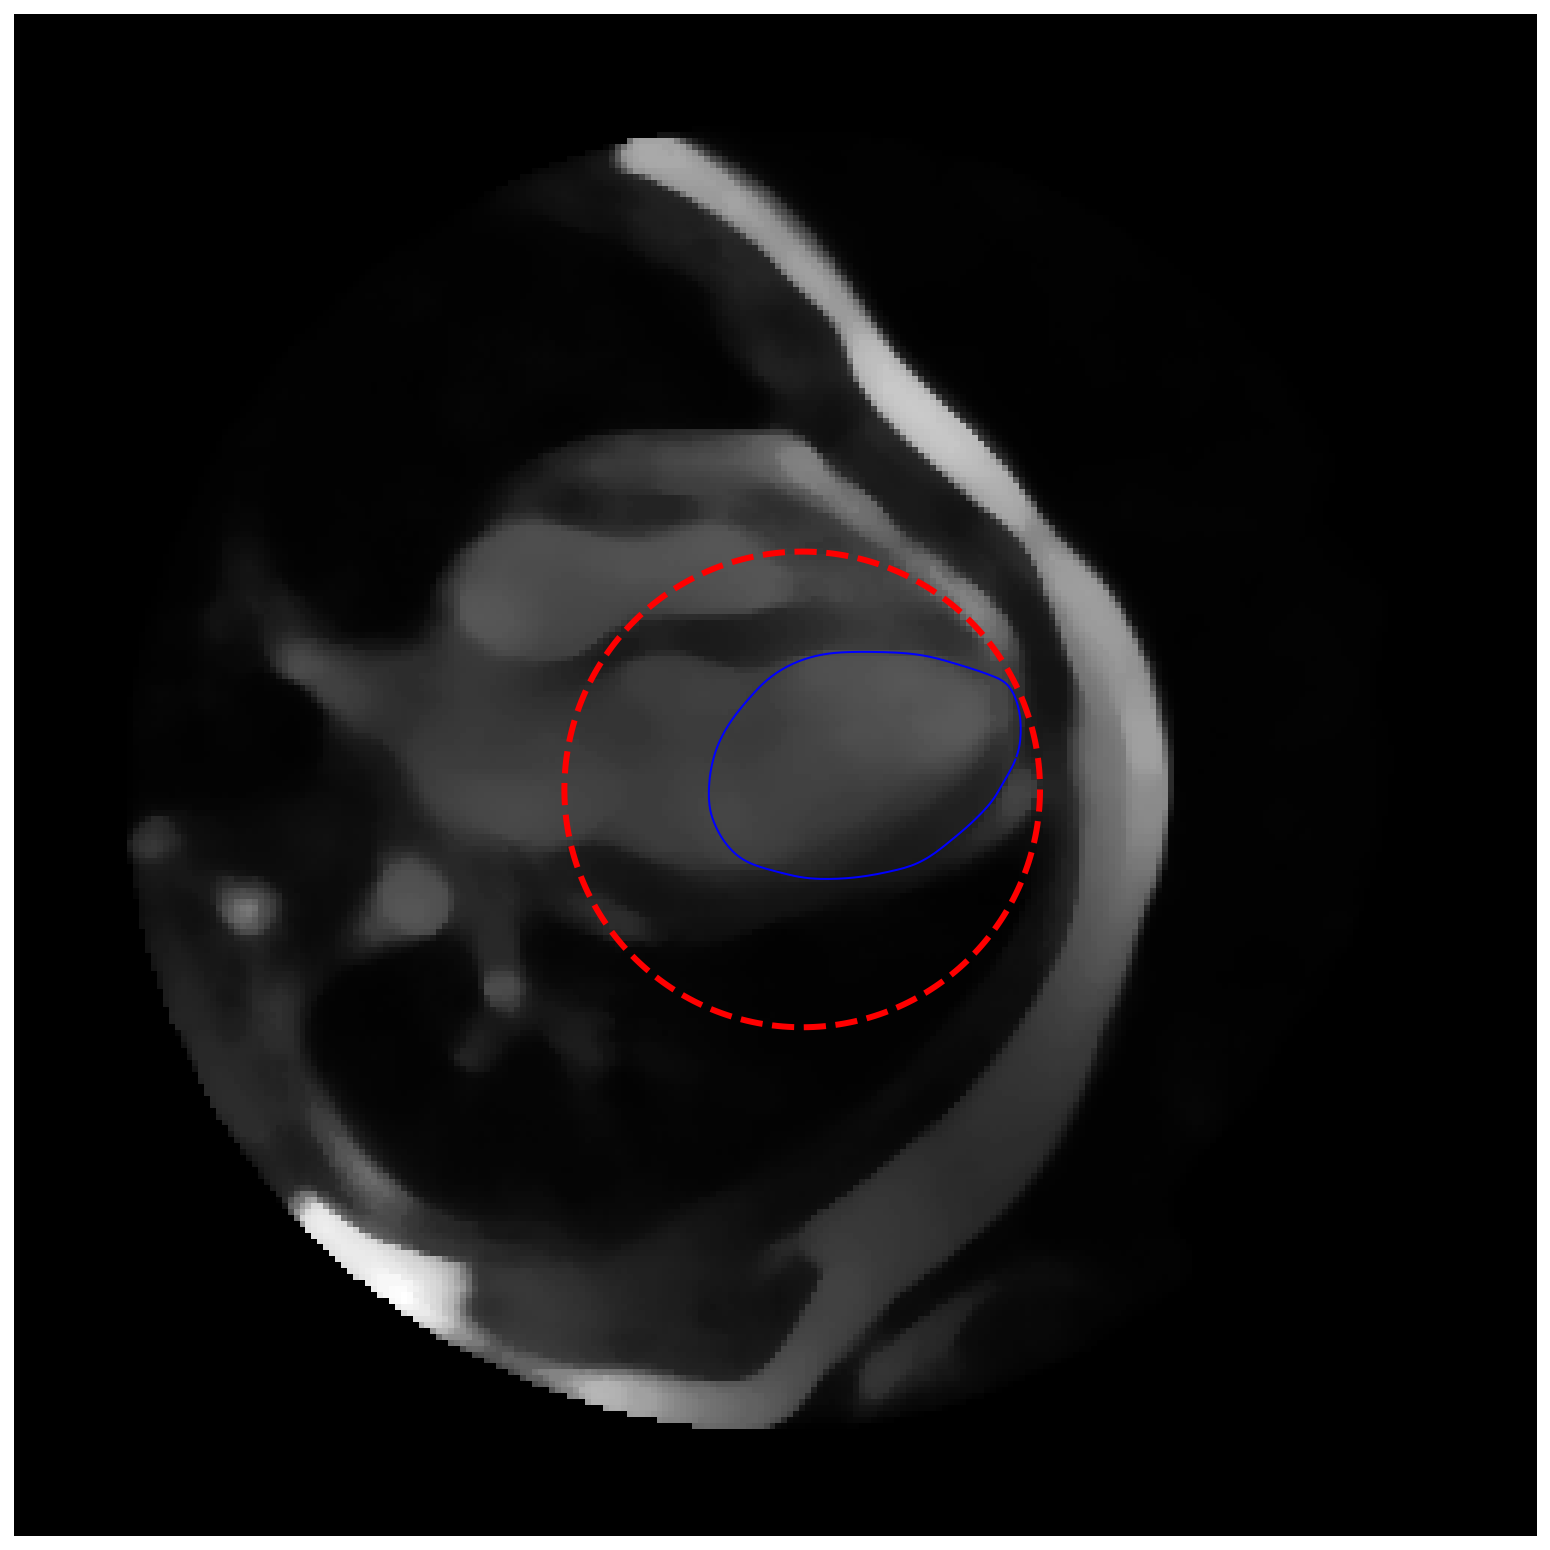

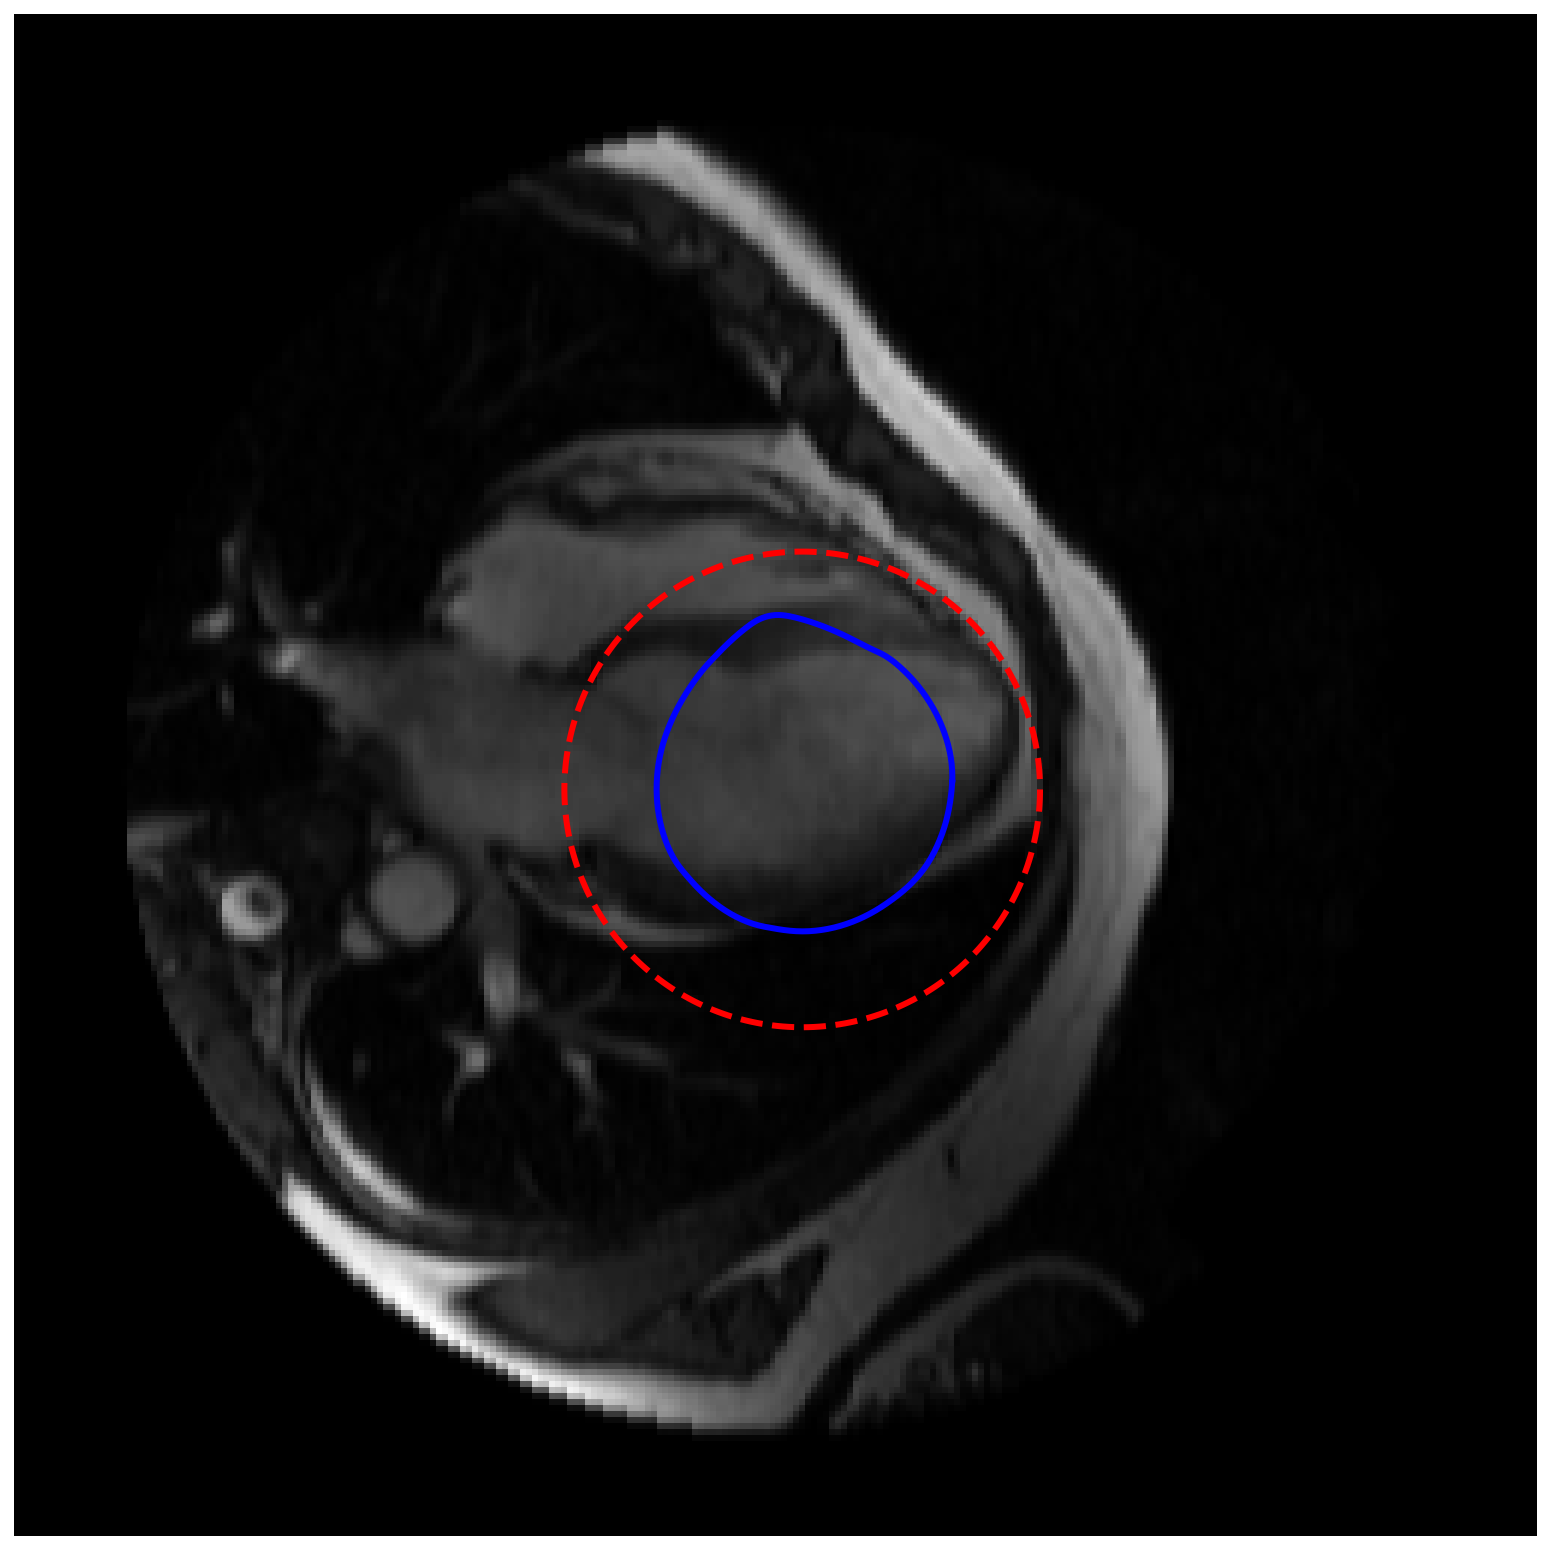

In [117]:
points = circle_points(290, [130, 132], 40)[:-2]
snake = seg.active_contour(image_gray, points,alpha=0.06,beta=0.1)
image_gray = color.rgb2gray(med)
fig, ax = image_show(med)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=1);
snake = seg.active_contour(image_gray, points,alpha=0.06,beta=0.01)
image_gray = color.rgb2gray(filtered_img)
fig, ax = image_show(filtered_img, cmap = "red")
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);

<ipython-input-102-518df8bd1749>:4: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  snake = seg.active_contour(edges, points,alpha=0.06,beta=0.001)


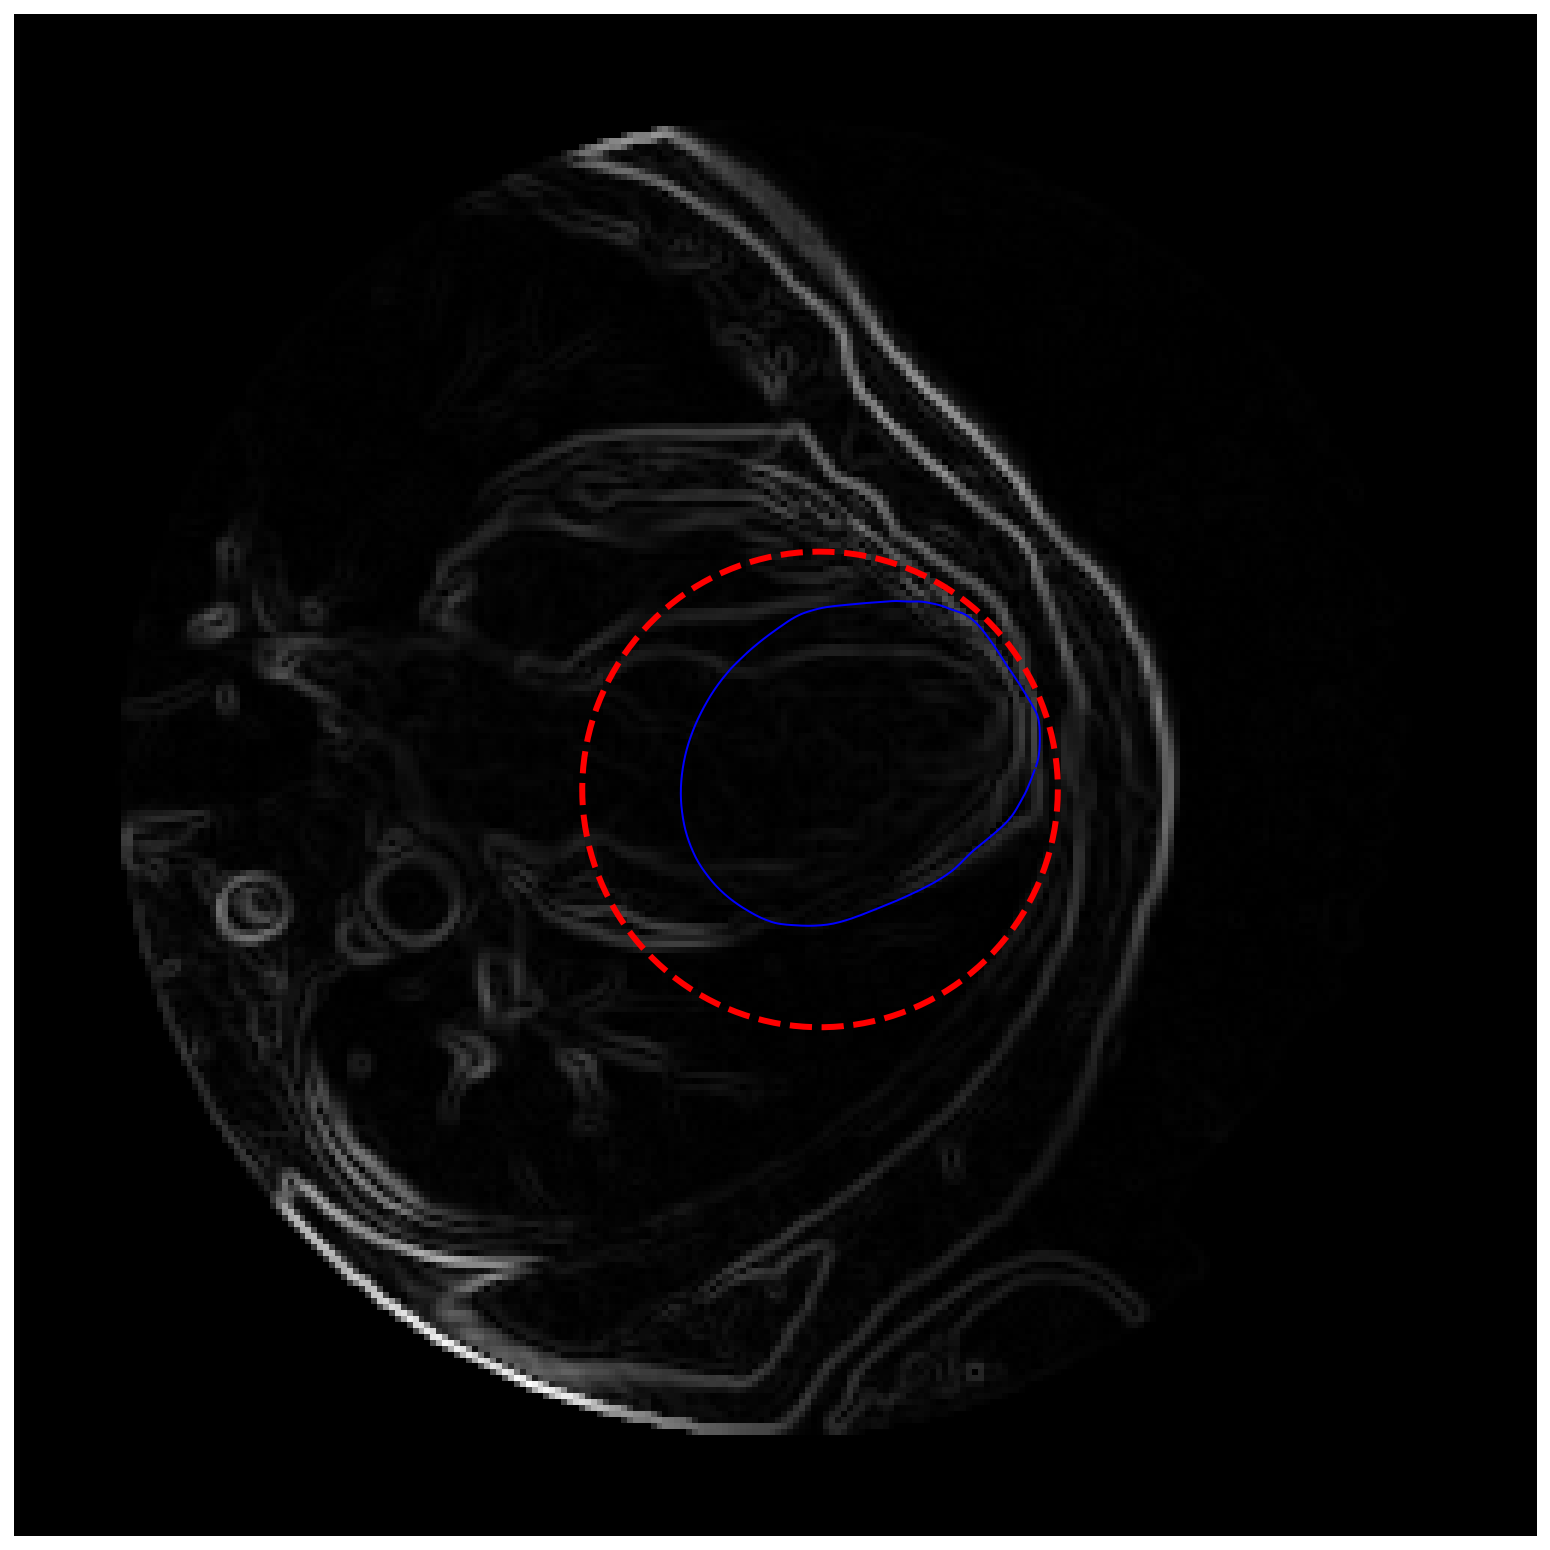

In [102]:

edges = filters.sobel(image1)
#plt.imshow(edges,cmap="gray")
points = circle_points(300, [130, 135], 40)[:-2]
snake = seg.active_contour(edges, points,alpha=0.06,beta=0.001)
fig, ax = image_show(edges)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=1);

In [34]:
import cv2 as cv
im2, contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
laplacian = cv2.Laplacian(image1,cv2.CV_64F)
plt.imshow(laplacian, cmap="gray")
cv.drawContours(image1, contours, -1, (0,255,0), 3)

TypeError: Expected Ptr<cv::UMat> for argument 'image'

<ipython-input-38-99ddb5b1448b>:4: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  snake = seg.active_contour(image10, points,alpha=0.06,beta=10)


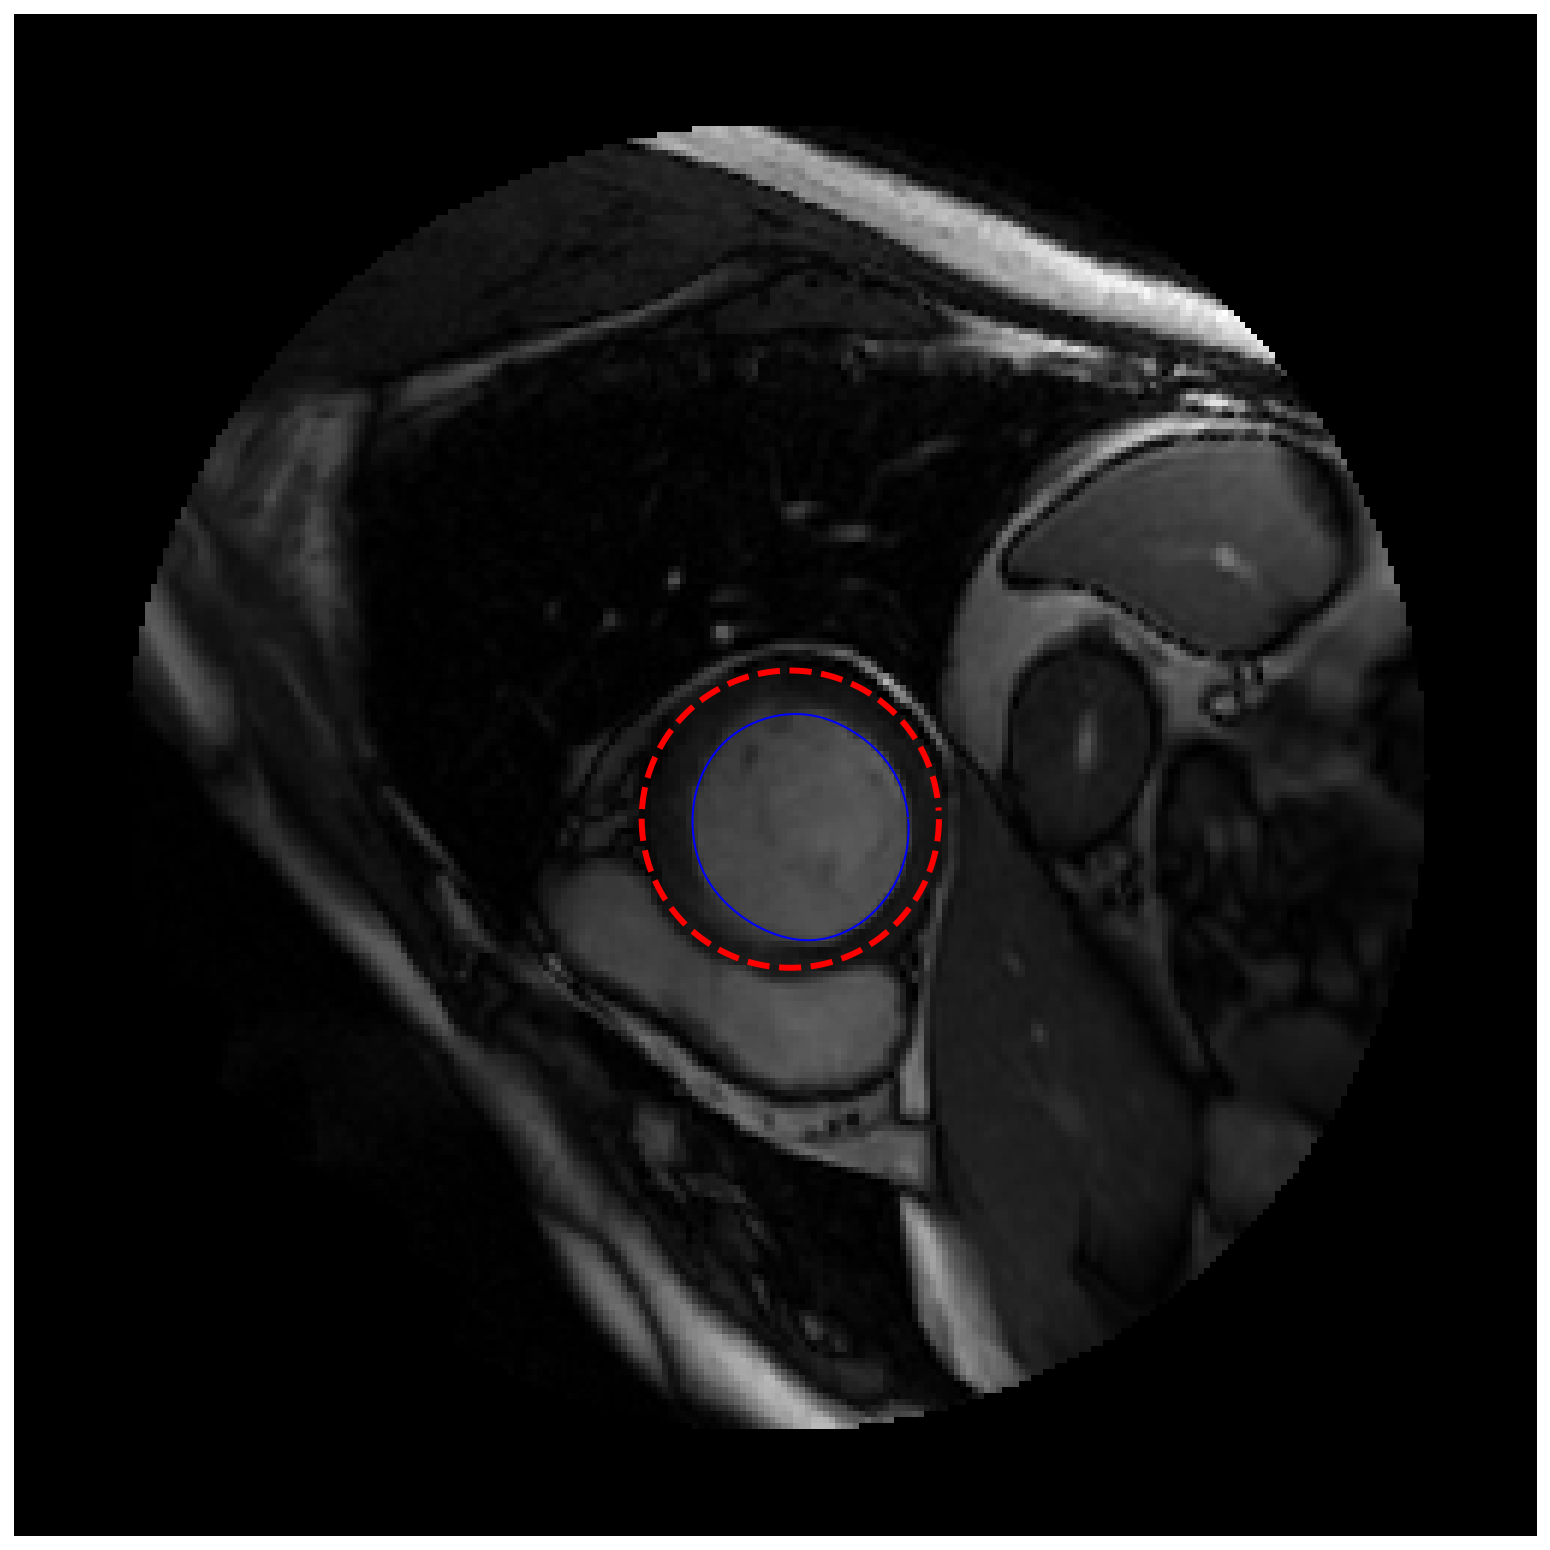

In [38]:

image10 = io.imread('CAP_SCD0000101_MR__hrt_raw_20120813120604507_78.dcm')
#plt.imshow(image10, cmap="gray");
points = circle_points(220, [135, 130], 25)[:-2]
snake = seg.active_contour(image10, points,alpha=0.06,beta=10)
fig, ax = image_show(image10)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=1);


NameError: name 'np' is not defined

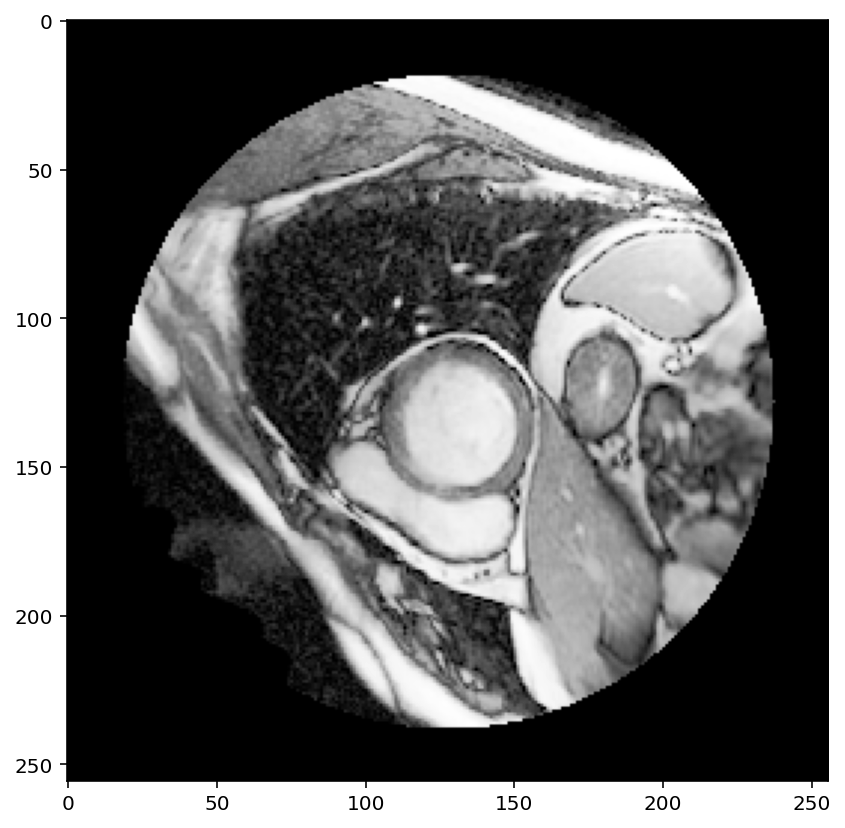

In [2]:
import matplotlib.pyplot as plt
from skimage import exposure
from skimage import io
image10 = io.imread('CAP_SCD0000101_MR__hrt_raw_20120813120604507_78.dcm')
equalized_hist_image10 = exposure.equalize_hist(image10)
plt.imshow(equalized_hist_image10, cmap= "gray")



def circle_points(resolution, center, radius):
    #Generate points which define a circle on an image.Centre refers to the centre of the circle 
    radians = np.linspace(0, 2*np.pi, resolution)
    c = center[1] + radius*np.cos(radians)#polar co-ordinates
    r = center[0] + radius*np.sin(radians)

    return np.array([c, r]).T
# Exclude last point because a closed path should not have duplicate points
points = circle_points(290, [130, 132], 40)[:-2]

def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax


points = circle_points(190, [135, 130], 20)[:-2]
snake = seg.active_contour(equalized_hist_image10, points,alpha=0.06,beta=80)
fig, ax = image_show(equalized_hist_image10)
#ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=1);


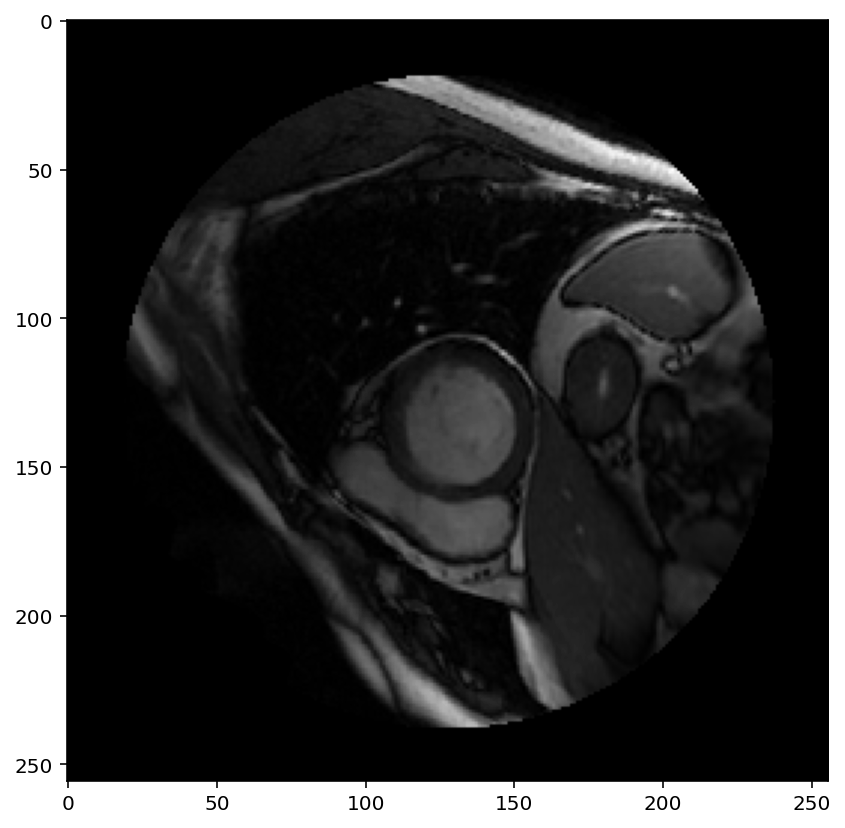

In [68]:


from skimage import data, exposure, img_as_float
MRI = img_as_float(io.imread('CAP_SCD0000101_MR__hrt_raw_20120813120604507_78.dcm')).astype(np.float32)
#MRI = img_as_float('CAP_SCD0000101_MR__hrt_raw_20120813120604507_78.dcm')
gamma_corrected = exposure.adjust_gamma(MRI, 0.5)
plt.imshow(MRI, cmap= "gray")